In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
import pandas as pd
import numpy as np
from math import pi
import requests
import seaborn as sns
from time import time
from datetime import datetime, timedelta
import matplotlib.patches as mpatches
from IPython.display import Image
%matplotlib inline

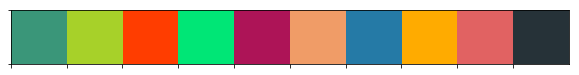

In [2]:
palette = ["#3a9679", "#a7d129","#ff3d00", "#00e676", "#ad1457", "#f09c67", "#257aa6", 
           "#ffab00", "#e16262", "#263238"]

sns.palplot(sns.color_palette(palette))

In [3]:
players = pd.read_csv('data.csv')

In [5]:
players.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [6]:
players.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
players[['Value', 'Wage']].head(1)

,Value,Wage
0,€110.5M,€565K


In [8]:
def clear(x):
    try:
        if 'M' in x:
            return float(x.split("M")[0][1:])
        elif 'K' in x:
            return float(x.split("K")[0][1:])/1000
    except:
        return 0

players['Value'] = players['Value'].apply(lambda x : clear(x))
players['Wage'] = players['Wage'].apply(lambda x : clear(x))

players[['Value', 'Wage']].head(1)

,Value,Wage
0,110.5,0.565


In [9]:
players.rename(columns={'Club Logo':'Club_Logo', 
                        'Preferred Foot' : 'Preferred_Foot', 'Body Type' : 'Body_Type',
                        'Jersey Number' : 'Jersey_Number', 'Loaned From' : 'Loaned_From', 
                        'Contract Valid Until' : 'Contract_Valid',
                        'Release Clause' : 'Release_Clause'}, inplace=True)

In [10]:
players = players.dropna(subset=['Club', 'Position', 'Value', 'Wage'])
players[['Release_Clause','Loaned_From','Joined']] = players[['Release_Clause',
                                                              'Loaned_From',
                                                              'Joined']].fillna('No data')
players = players.fillna(0)
players = players.reset_index()

In [11]:
players.isnull().sum().sum()

0

In [12]:
players.Body_Type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'],
      dtype=object)

In [13]:
def body_type_func(players):
    if players in('Messi', 'C. Ronaldo', 'Neymar', 'Courtois', 'PLAYER_BODY_TYPE_25', 
                  'Shaqiri', 'Akinfenwa'):
        return 'Normal'
    else:
        return players
    
players['Body_Type'] = players['Body_Type'].apply(body_type_func)

## Some basic graphics

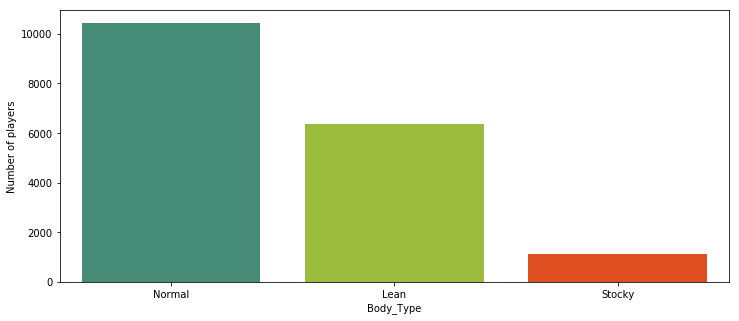

In [14]:
plt.figure(figsize=(12,5))
ax = sns.countplot('Body_Type', data = players,
                  palette= palette)
plt.ylabel('Number of players')
plt.show()

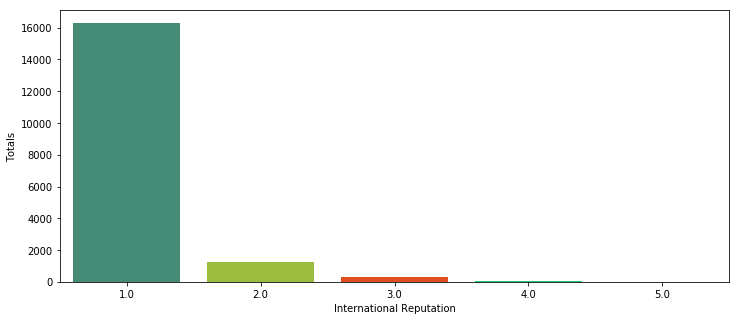

In [15]:
plt.figure(figsize=(12,5))
ax = sns.countplot('International Reputation', data = players,
                  palette= palette)
plt.ylabel('Totals')
plt.show()


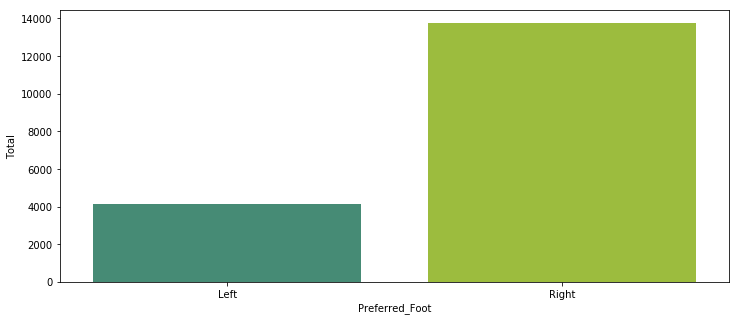

In [16]:
plt.figure(figsize=(12,5))
ax = sns.countplot('Preferred_Foot', data = players,
                  palette= palette)
plt.ylabel('Total')
plt.show()


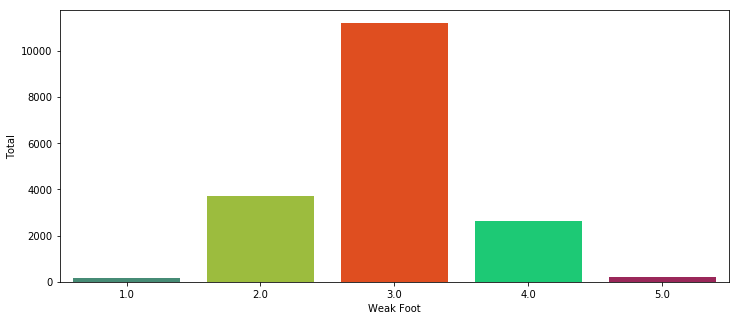

In [17]:
plt.figure(figsize=(12,5))
ax = sns.countplot('Weak Foot', data = players,
                  palette= palette)
plt.ylabel('Total')
plt.show()


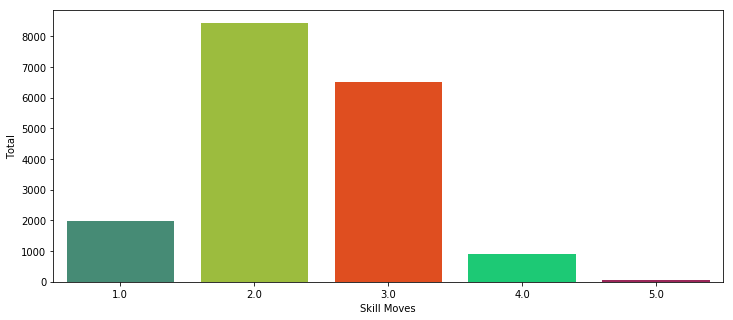

In [18]:
plt.figure(figsize=(12,5))
ax = sns.countplot('Skill Moves', data = players,
                  palette= palette)
plt.ylabel('Total')
plt.show()


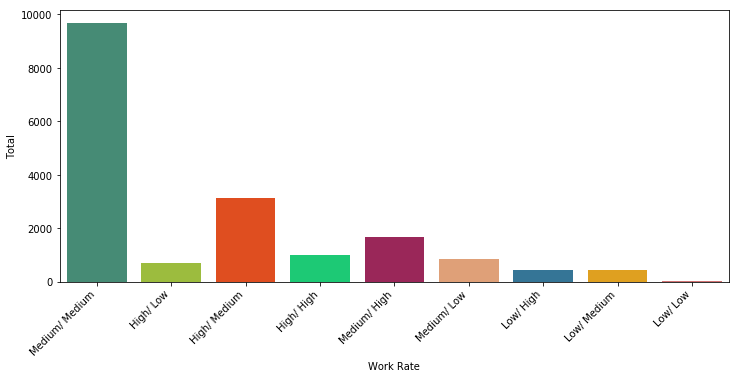

In [19]:
plt.figure(figsize=(12,5))
plt.xticks(rotation = 45, ha = 'right')
ax = sns.countplot('Work Rate', data = players,
                  palette= palette)
plt.ylabel('Total')
plt.show()


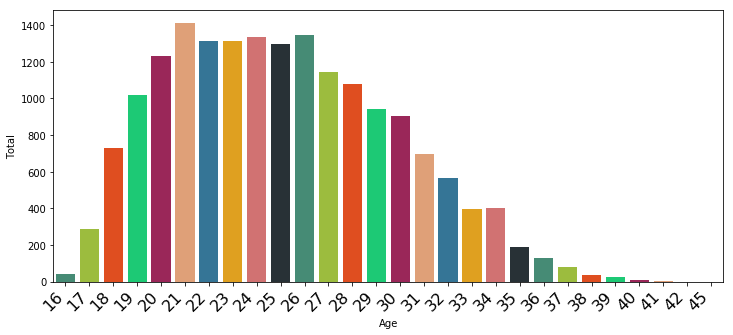

In [20]:
plt.figure(figsize=(12,5))
ax = sns.countplot('Age', data = players,
                   palette= palette)
plt.ylabel('Total')
plt.xticks(rotation = 45, ha = 'right', size=16)
plt.show()


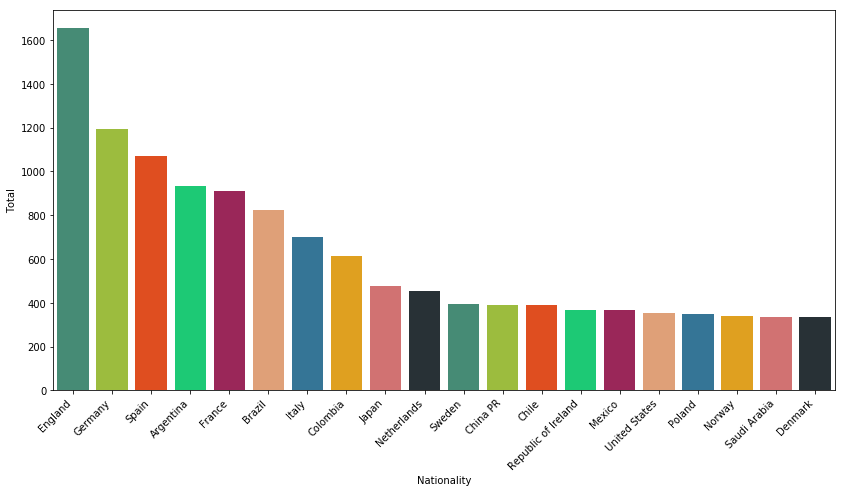

In [21]:
plt.figure(figsize = (14,7))
ax = sns.countplot('Nationality', data = players ,
                   order = players['Nationality'].value_counts()[:20].index,
                   palette= palette)
plt.ylabel('Total')
plt.xticks(rotation = 45, ha = 'right')
plt.show()


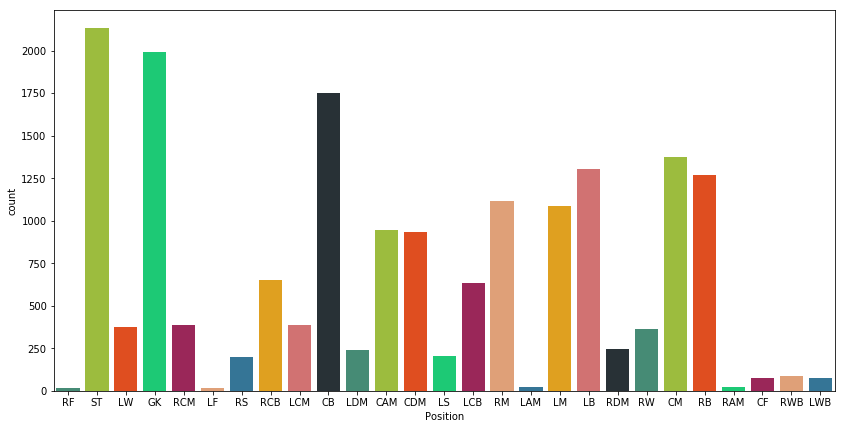

In [22]:
plt.figure(figsize = (14,7))
sns.countplot(x = 'Position', data = players, palette = palette);

In [23]:
def defending(players):
    return int(round((players[['Interceptions','Marking', 'StandingTackle', 
                               'SlidingTackle', 'HeadingAccuracy']].mean()).mean()))

def passing(players):
    return int(round((players[['Vision', 'Crossing', 'ShortPassing',
                               'LongPassing','FKAccuracy','Curve']].mean()).mean()))

def dribbling(players):
    return int(round((players[['Agility', 'Balance', 'Reactions', 
                               'BallControl', 'Dribbling']].mean()).mean()))

def shooting(players):
    return int(round((players[['Positioning', 'Finishing', 'ShotPower', 
                               'LongShots', 'Volleys', 'Penalties']].mean()).mean()))

def pace(players):
    return int(round((players[['Acceleration', 'SprintSpeed']].mean()).mean()))

def physical(players):
    return int(round((players[['Jumping', 'Stamina', 'Strength', 'Aggression', 
                               'Composure']].mean()).mean()))

def ambidextrous_func(players):
    return (int(players) * 10) + 50

In [24]:
timeFinish = 0
start_time = time()

In [25]:
players['Defending'] = players.apply(defending, axis=1)

In [26]:
players['Passing'] = players.apply(passing, axis=1)

In [27]:
players['Dribbling'] = players.apply(dribbling, axis=1)

In [28]:
players['Shooting'] = players.apply(shooting, axis=1)

In [29]:
players['Pace'] = players.apply(pace, axis=1)

In [30]:
players['Physical'] = players.apply(physical, axis=1)

In [31]:
players['Ambidextrous'] = players['Weak Foot'].apply(ambidextrous_func)

In [32]:
timeFinish += (time() - start_time)
print('Ending - time: ' + str(timedelta(seconds=timeFinish)))

Ending - time: 0:02:13.670166


In [33]:
len(players.columns)

96

In [34]:
data = players[['ID','Name','Defending','Passing','Dribbling','Shooting',
                'Pace','Physical','Ambidextrous','GKDiving', 
                'GKHandling', 'GKKicking', 'GKReflexes','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club', 'Position', 
                'Value', 'Wage','Preferred_Foot','Body_Type','Jersey_Number',
                'Joined','Loaned_From','Height','Weight','Contract_Valid', 
                'Overall','Potential']]

In [35]:
data.head(1)

,ID,Name,Defending,Passing,Dribbling,Shooting,Pace,Physical,Ambidextrous,GKDiving,...,Preferred_Foot,Body_Type,Jersey_Number,Joined,Loaned_From,Height,Weight,Contract_Valid,Overall,Potential
0,158023,L. Messi,36,90,95,88,88,69,90,6.0,...,Left,Normal,10.0,"Jul 1, 2004",No data,5'7,159lbs,2021,94,94


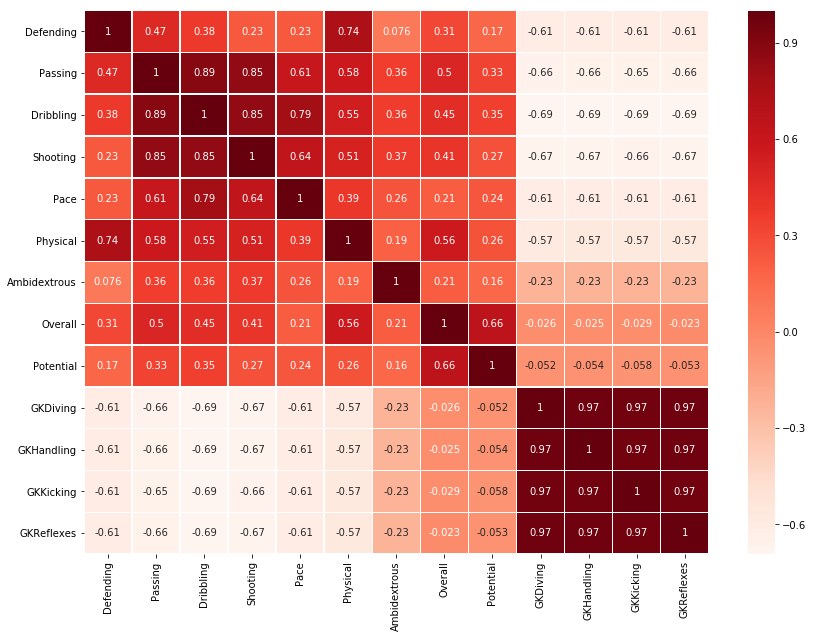

In [36]:
plt.figure(figsize = (14,10))
sns.heatmap(players[['Defending', 'Passing', 'Dribbling', 'Shooting', 'Pace',
       'Physical', 'Ambidextrous', 'Overall', 'Potential','GKDiving', 'GKHandling', 
        'GKKicking','GKReflexes']].corr(), annot = True, 
                     linewidths=.5, cmap= 'Reds')
plt.show()

## Polar graph of player statistics

In [37]:
def graph_function(row):
    
    flag_image = "example/img_flag.jpg"
    player_image = "example/img_player.jpg"
    logo_image = "example/img_club_logo.jpg"
    fondo_grafico = mpimg.imread('example/fondo.jpg')
    face_photo = data.Photo[row]

    not_found = 'https://cdn.sofifa.org/players/4/notfound_0.png'
    r = requests.get(face_photo)
    
    if r.status_code == 404:
        face_photo = not_found
        
    player_img = requests.get(face_photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
        
    img_flag = requests.get(data.Flag[row]).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)

     
    logo_img = requests.get(data.Club_Logo[row]).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)

    basic_color = '#37474f'
    color_annotate = '#01579b'

    plt.figure(figsize=(15,8))
    categories=list(data)[1:]

    if data.Position[row] != 'GK':
        categories_graph = ['Defending','Passing','Dribbling','Shooting','Pace','Physical',
                            'Ambidextrous']
        categories_drop = ['ID', 'Name','GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Name']
        valuesUseGraph = [data.Defending[row], data.Passing[row], data.Dribbling[row], 
                        data.Shooting[row], data.Pace[row],
                        data.Physical[row], data.Ambidextrous[row], data.Defending[row]]    
    else:
        categories_graph = ['GKDiving','GKHandling', 'GKKicking', 'GKReflexes', 'Ambidextrous']
        categories_drop = ['ID', 'Name','Defending','Passing','Dribbling','Shooting','Pace',
                           'Physical']
        valuesUseGraph = [data.GKDiving[row], data.GKHandling[row], data.GKKicking[row], 
                          data.GKReflexes[row], data.Ambidextrous[row], data.GKDiving[row]] 

    N = len(categories_graph)
    
    for i in categories_drop:
        if i in categories:
            categories.remove(i)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
        
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
 
    ax.plot(angles, valuesUseGraph, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, valuesUseGraph, color= color_annotate, alpha=0.5)

    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    img = mpimg.imread(flag_image)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')

    ax_fondo = plt.gcf().add_axes(axes_coords, zorder=1)
    ax_fondo.axis('off')
    fondo = ax_fondo.imshow(fondo_grafico, alpha=0.2)
    clip = [c for c in ax.get_children() if type(c) == matplotlib.patches.Wedge][0]
    fondo.set_clip_path(clip)

    ax.annotate('Nacionality: ' + data.Nationality[row].upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
        
    ax.annotate('Name: ' + data.Name[row].upper(), xy=(10,10), xytext=(43, 180),
                fontsize= 13,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + data.Club[row].upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    
    arr_img_logo = plt.imread(logo_image, format='jpg')
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-320, -226),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abLogo)

    labels = ['Age: ' + str(int(data.Age[row])), 'Position: ' + data.Position[row], 
              'Jersey Number: ' + str(int(data.Jersey_Number[row])), 'Height: ' + data.Height[row], 
              'Weight: ' + data.Weight[row],  'Body Type: ' + data.Body_Type[row], 
              'Preferred Foot: ' + data.Preferred_Foot[row], 'Value: ' + str(data.Value[row]) + ' M', 
              'Wage: ' + str(int(data.Wage[row] * 1000)) + ' K', 'Loaned From: ' + 
              data.Loaned_From[row], 'Joined: ' + data.Joined[row], 'Contract Valid: ' 
              + data.Contract_Valid[row]]

    patches = [plt.plot([],[],[],[],[],[],[],[],[],[],[],[], marker="s", ms=10, ls="", 
               mec=None, color= color_annotate, label="{:s}".format(labels[i]))[0]  
               for i in range(len(labels))]

    ax.legend(handles=patches, bbox_to_anchor=(1.30, 1.08),  loc='upper left', borderaxespad=0.)

In [38]:
def graphPolar(id = 0):
    if 0 <= id < len(players.ID):
        graph_function(row = data.index[id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

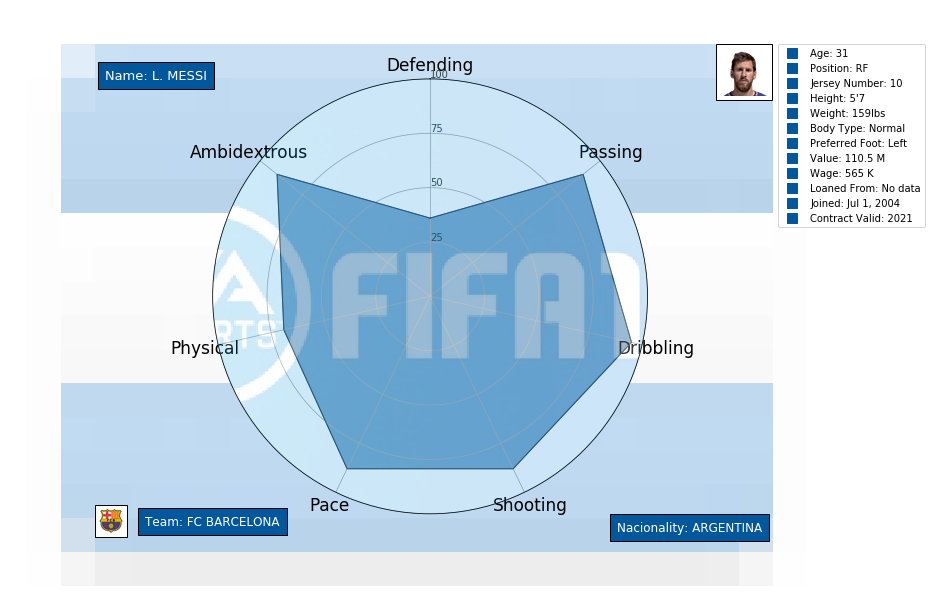

In [39]:
graphPolar()

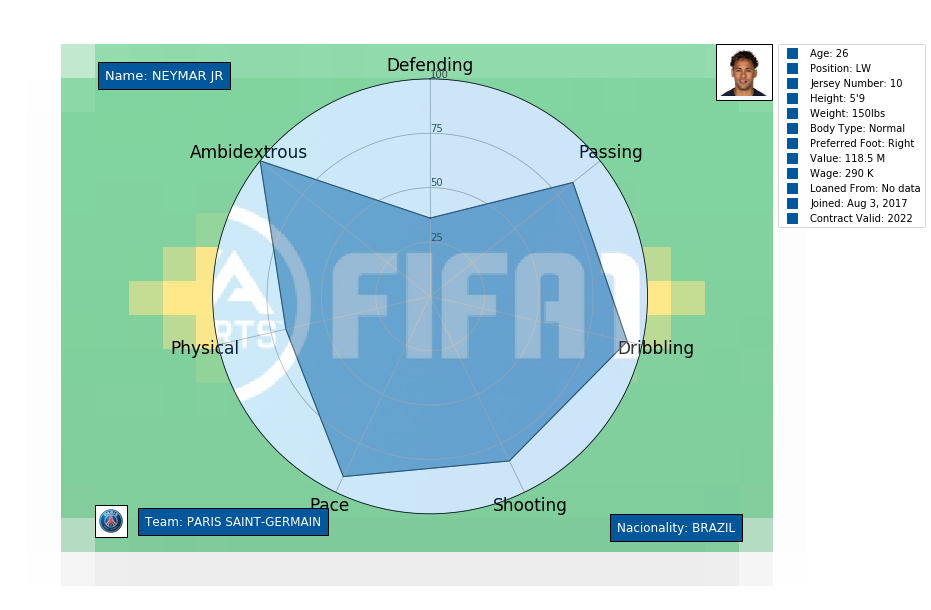

In [40]:
#### No GK
graphPolar(2)

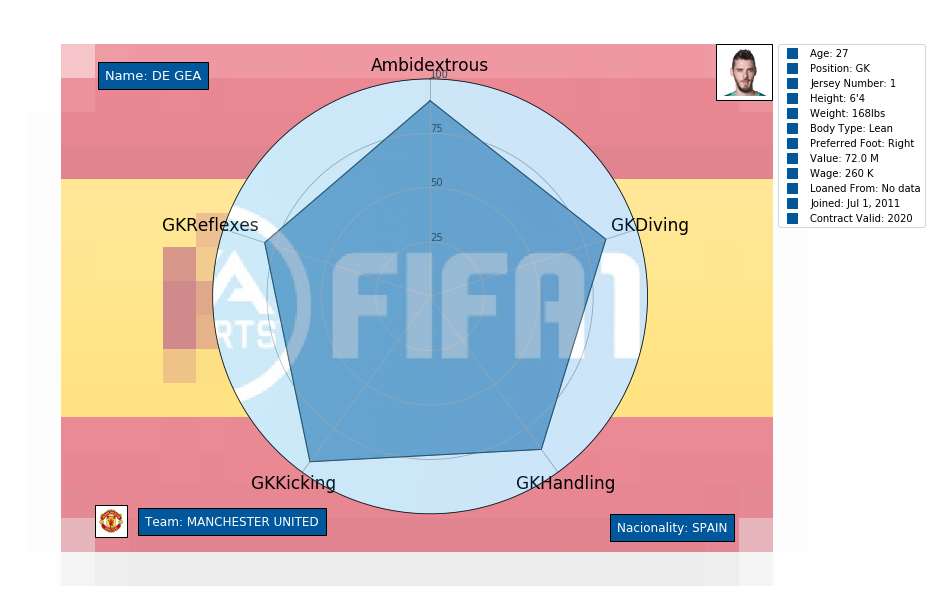

In [41]:
#### GK
graphPolar(3)

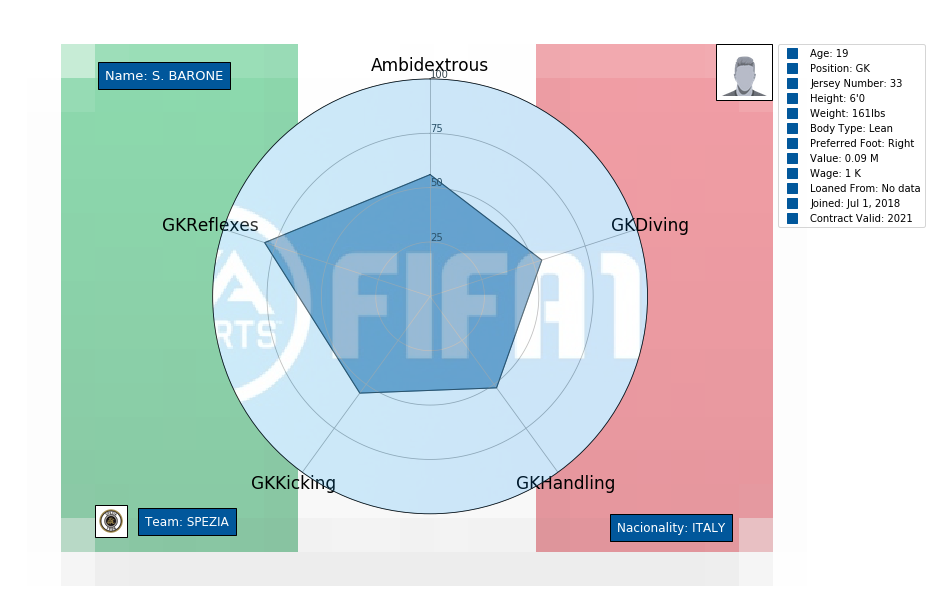

In [42]:
# Player without photography
graphPolar(17035)

In [43]:
player_features = ('Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties')

for i, val in players.groupby(players['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Dribbling
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: BallControl, Aggression, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, Bal

In [44]:
potential_filter = data.groupby('Position')['Potential'].max()
print('Total of positions: ' + str(len(potential_filter)))
potential_filter

Total of positions: 27


Position
CAM    91
CB     92
CDM    90
CF     88
CM     90
GK     93
LAM    89
LB     88
LCB    92
LCM    90
LDM    90
LF     94
LM     90
LS     89
LW     93
LWB    83
RAM    86
RB     88
RCB    91
RCM    92
RDM    91
RF     94
RM     95
RS     91
RW     92
RWB    86
ST     94
Name: Potential, dtype: int64

In [45]:
columns = ['ID','Name','Club','Value', 'Wage','Position', 'Potential', 'Defending','Passing', 
           'Dribbling', 'Shooting','Pace','Physical','Ambidextrous', 'GKDiving', 'GKHandling',
           'GKKicking', 'GKReflexes']

dream_team = pd.DataFrame(columns = columns)


for x in range(0, len(potential_filter)):
    
    data_filter = data[(data['Potential'] == potential_filter.values[x]) 
                & (data['Position'] == potential_filter.index[x])].drop_duplicates('Position')
    
    dream_team = dream_team.append(data_filter, ignore_index=True, sort=False)

dream_team.rename(columns={'Position':'Posit', 'Potential' : 'Pot', 'Defending' : 'Def','Passing' : 'Pass', 
                           'Dribbling' : 'Drib', 'Shooting' : 'Shoot','Pace' : 'pace','Physical' : 'Phys',
                           'Ambidextrous' : 'Amb','GKDiving' : 'GKDiv','GKHandling' : 'GKHand',
                           'GKKicking' : 'GKKick','GKReflexes' : 'GKRefl'}, inplace=True)
    
dream_team.style.set_table_styles(
     [{'selector': 'tr:hover',
       'props': [('background-color', 'yellow')]}]
)

,ID,Name,Club,Value,Wage,Posit,Pot,Def,Pass,Drib,Shoot,pace,Phys,Amb,GKDiv,GKHand,GKKick,GKRefl,Flag,Age,Nationality,Photo,Club_Logo,Preferred_Foot,Body_Type,Jersey_Number,Joined,Loaned_From,Height,Weight,Contract_Valid,Overall
0,190460,C. Eriksen,Tottenham Hotspur,73.5,0.205,CAM,91,49,88,85,80,74,67,100,9,14,7,6,https://cdn.sofifa.org/flags/13.png,26,Denmark,https://cdn.sofifa.org/players/4/19/190460.png,https://cdn.sofifa.org/teams/2/light/18.png,Right,Lean,10,"Aug 30, 2013",No data,5'11,168lbs,2020,88
1,205600,S. Umtiti,FC Barcelona,57,0.205,CB,92,86,69,72,66,72,83,80,15,10,14,15,https://cdn.sofifa.org/flags/18.png,24,France,https://cdn.sofifa.org/players/4/19/205600.png,https://cdn.sofifa.org/teams/2/light/241.png,Left,Normal,23,"Jul 12, 2016",No data,6'0,165lbs,2023,87
2,200145,Casemiro,Real Madrid,59.5,0.285,CDM,90,86,72,72,69,62,87,80,13,14,16,12,https://cdn.sofifa.org/flags/54.png,26,Brazil,https://cdn.sofifa.org/players/4/19/200145.png,https://cdn.sofifa.org/teams/2/light/243.png,Right,Normal,14,"Jul 11, 2013",No data,6'1,185lbs,2021,88
3,205175,A. Milik,Napoli,25.5,0.071,CF,88,43,65,72,82,72,70,80,9,16,16,6,https://cdn.sofifa.org/flags/37.png,24,Poland,https://cdn.sofifa.org/players/4/19/205175.png,https://cdn.sofifa.org/teams/2/light/48.png,Left,Lean,7,"Aug 2, 2016",No data,6'1,172lbs,2021,81
4,223848,S. Milinković-Savić,Lazio,50.5,0.073,CM,90,78,79,76,75,69,83,90,7,10,7,7,https://cdn.sofifa.org/flags/51.png,23,Serbia,https://cdn.sofifa.org/players/4/19/223848.png,https://cdn.sofifa.org/teams/2/light/46.png,Right,Normal,21,"Aug 6, 2015",No data,6'3,168lbs,2023,85
5,193080,De Gea,Manchester United,72,0.26,GK,93,20,38,51,20,58,56,80,90,85,87,94,https://cdn.sofifa.org/flags/45.png,27,Spain,https://cdn.sofifa.org/players/4/19/193080.png,https://cdn.sofifa.org/teams/2/light/11.png,Right,Lean,1,"Jul 1, 2011",No data,6'4,168lbs,2020,91
6,198710,J. Rodríguez,FC Bayern München,69.5,0.315,LAM,89,51,88,84,85,70,69,80,15,15,15,14,https://cdn.sofifa.org/flags/56.png,26,Colombia,https://cdn.sofifa.org/players/4/19/198710.png,https://cdn.sofifa.org/teams/2/light/21.png,Left,Normal,10,No data,Real Madrid,5'11,172lbs,"Jun 30, 2019",88
7,176676,Marcelo,Real Madrid,43,0.285,LB,88,80,81,88,70,82,83,90,12,5,5,9,https://cdn.sofifa.org/flags/54.png,30,Brazil,https://cdn.sofifa.org/players/4/19/176676.png,https://cdn.sofifa.org/teams/2/light/243.png,Left,Normal,12,"Jan 1, 2007",No data,5'9,176lbs,2022,88
8,232363,M. Škriniar,Inter,46.5,0.082,LCB,92,86,50,61,41,72,81,90,10,13,12,12,https://cdn.sofifa.org/flags/43.png,23,Slovakia,https://cdn.sofifa.org/players/4/19/232363.png,https://cdn.sofifa.org/teams/2/light/44.png,Right,Normal,37,"Jul 7, 2017",No data,6'2,176lbs,2022,85
9,182521,T. Kroos,Real Madrid,76.5,0.355,LCM,90,71,88,80,82,63,65,100,10,11,13,10,https://cdn.sofifa.org/flags/21.png,28,Germany,https://cdn.sofifa.org/players/4/19/182521.png,https://cdn.sofifa.org/teams/2/light/243.png,Right,Normal,8,"Jul 17, 2014",No data,6'0,168lbs,2022,90


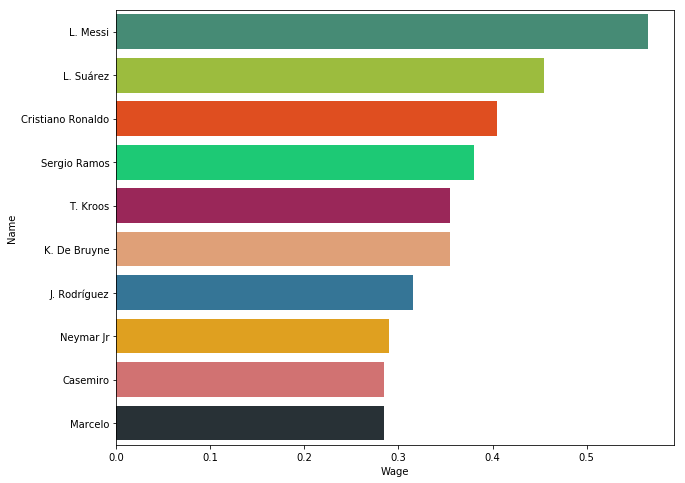

In [46]:
player_wage = dream_team[['Name', 'Wage']]
player_wage = player_wage.sort_values(by=['Wage'], ascending = False).head(10)
plt.subplots(figsize=(10, 8))
sns.barplot(x="Wage", y="Name", data=player_wage,
            label="Total", palette= palette)

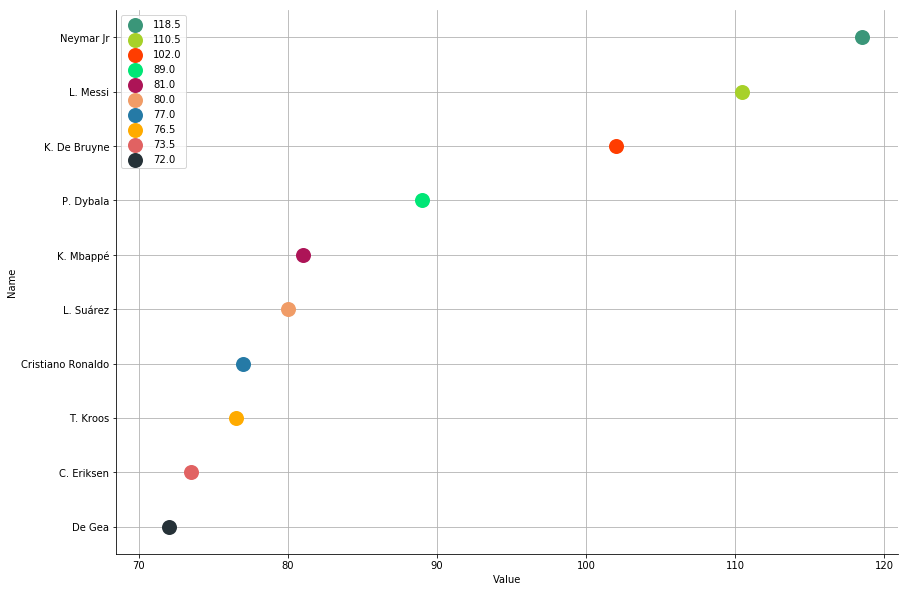

In [47]:
dream_team_player_value = dream_team.sort_values(by=['Value'], ascending = False).head(10)

g = sns.swarmplot(y = "Name",
              x = 'Value', 
              data = dream_team_player_value,
              size = 15,
              palette = palette)
g.figure.set_size_inches(14,10)
sns.despine()
plt.legend(dream_team_player_value.Value)
plt.grid()

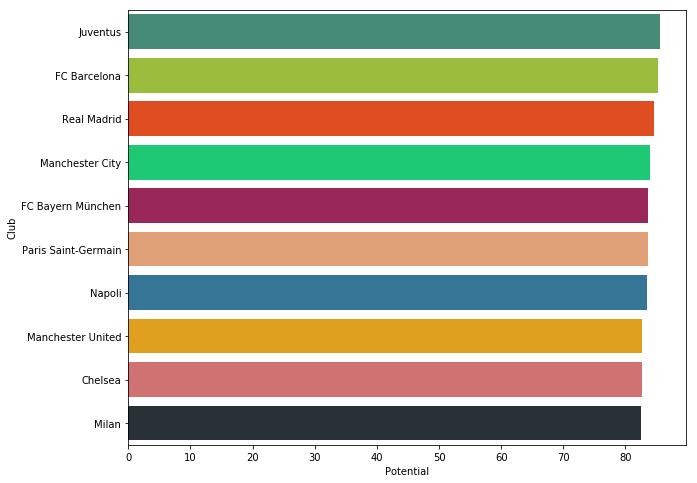

In [48]:
potential_for_club = players[['Club', 'Potential', 'Name']]
potential_for_club = potential_for_club.groupby(['Club']).mean()
potential_for_club = potential_for_club.sort_values(by=['Potential'], ascending = False).head(10)
potential_for_club = potential_for_club.reset_index()
plt.subplots(figsize=(10, 8))
sns.barplot(x="Potential", y="Club", data=potential_for_club,
            label="Total", palette= palette)

In [49]:
potential_for_club

,Club,Potential
0,Juventus,85.520000
1,FC Barcelona,85.303030
2,Real Madrid,84.636364
3,Manchester City,83.909091
4,FC Bayern München,83.655172
5,Paris Saint-Germain,83.566667
6,Napoli,83.440000
7,Manchester United,82.666667
8,Chelsea,82.636364
9,Milan,82.555556


In [50]:
lista = sorted(potential_for_club.Club.tolist())

In [51]:
club_wage = data[data.Club.isin(lista)]

In [52]:
equip = club_wage.sort_values(by=['Club'])
equip = equip.reset_index(drop=True)

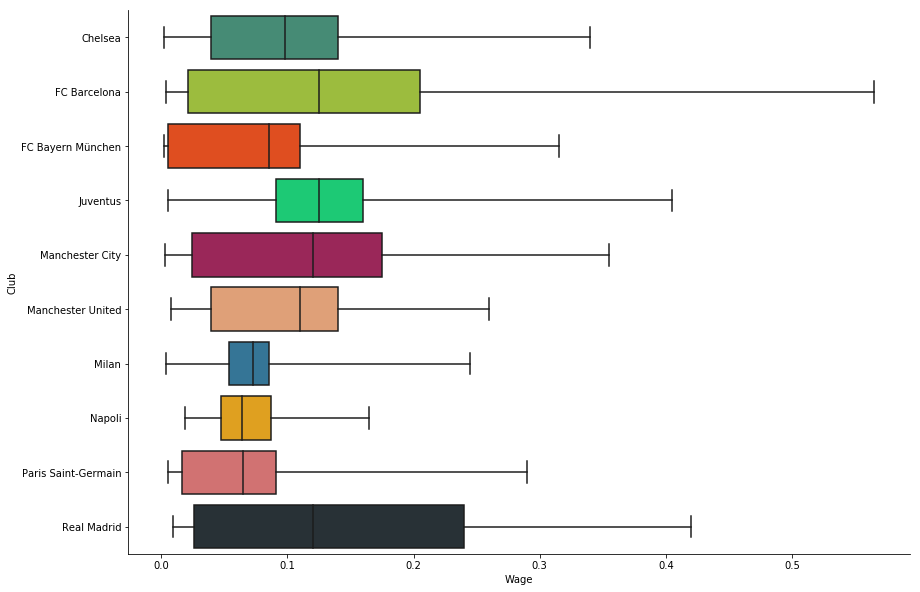

In [53]:
g = sns.boxplot(y = "Club",
                x = 'Wage',
                whis=np.inf,
                data = equip,
                palette = palette)
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [54]:
columnsDos = ['ID','Name','Club','Value', 'Wage','Position', 'Potential', 'Defending','Passing', 
           'Dribbling', 'Shooting','Pace','Physical','Ambidextrous', 'GKDiving', 'GKHandling',
           'GKKicking', 'GKReflexes']

maxWage = equip.groupby('Club')['Wage'].max()
resume = pd.DataFrame(columns = columns)

In [55]:
for x in range ( 0, len(maxWage)):
    data = equip[(equip.Club == maxWage.index[x]) & (equip.Wage == maxWage.values[x])]
    resume = resume.append(data, ignore_index=True, sort=False)

In [56]:
resume = resume[['Name','Wage', 'Club']]
resume = resume.reset_index()
resume

,index,Name,Wage,Club
0,0,E. Hazard,0.340,Chelsea
1,1,L. Messi,0.565,FC Barcelona
2,2,J. Rodríguez,0.315,FC Bayern München
3,3,Cristiano Ronaldo,0.405,Juventus
4,4,K. De Bruyne,0.355,Manchester City
5,5,De Gea,0.260,Manchester United
6,6,G. Higuaín,0.245,Milan
7,7,L. Insigne,0.165,Napoli
8,8,Neymar Jr,0.290,Paris Saint-Germain
9,9,L. Modrić,0.420,Real Madrid


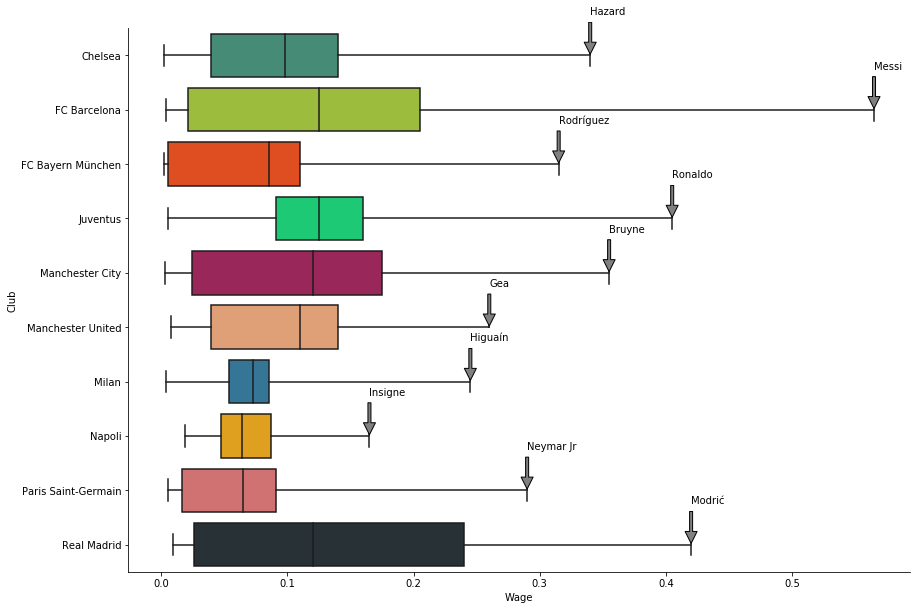

In [57]:
xyte = []

for x in range(0, len(resume)):
    xyte.append(((resume.Wage[x]), x - 0.75))

for x in range(0, len(resume)):
    
    if resume.Name[x] != 'Neymar Jr':
        words = resume.Name[x].split()
        name = words[-1]
    else:
        name = resume.Name[x]
        
    plt.annotate(s = name,
                 xy = (resume.Wage[x],x),
                 xytext = (xyte[x]), 
                 arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
                 backgroundcolor = 'white')

g = sns.boxplot(y = "Club",
                x = "Wage", 
                data = equip,
                whis=np.inf,
                palette= palette)

sns.despine()
g.figure.set_size_inches(14,10)
plt.show()   

In [58]:
nacionalities = players.Nationality[players.Club.isin(potential_for_club.Club)]
nac_potential_club = pd.DataFrame({'id':nacionalities.index, 'nacionality':nacionalities.values})
nac_potential_club = nac_potential_club.groupby(['nacionality']).count().sort_values(by=['id'], 
                                                                                     ascending = False).head(10)
nac_potential_club = nac_potential_club.reset_index()
nac_potential_club

,nacionality,id
0,Spain,58
1,France,35
2,Italy,34
3,England,29
4,Germany,28
5,Brazil,24
6,Argentina,13
7,Belgium,9
8,Portugal,7
9,Croatia,7


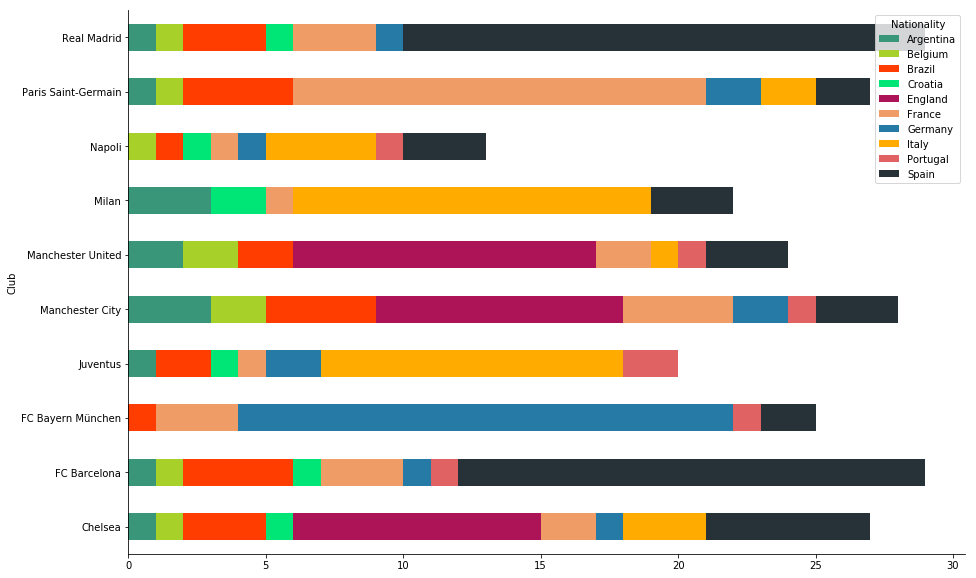

In [59]:
nac_for_equip = players[(players['Club'].isin(potential_for_club.Club.tolist())) & 
                      (players['Nationality'].isin(nac_potential_club.nacionality)) 
                     ]
df_plot = nac_for_equip.groupby(['Club', 'Nationality']).size().reset_index().pivot(columns='Club', 
                                                                                         index='Nationality', 
                                                                                         values=0).reset_index()
g = df_plot.set_index('Nationality').T.plot(kind='barh', stacked=True, color=palette)
sns.despine()
g.figure.set_size_inches(15,10)
    
plt.show()

In [60]:
def write_to_html_file(df, title='', filename='out.html'):
    result = '''
<html>
<head>
<style>
    html { 
      background: url(https://wallpapercave.com/wp/wp3535268.jpg) no-repeat center center fixed; 
       -webkit-background-size: cover;
       -moz-background-size: cover;
       -o-background-size: cover;
       background-size: cover;
    }
    h1 {
        margin-top: 7%;
        text-align: center;
        font-family: Helvetica, Arial, sans-serif;
        color: #ffffff;
    }
    table { 
        margin-left: auto;
        margin-right: auto;
        background-color: #ffffff;
    }
    table, th, td {
        border: 1px solid black;
        border-collapse: collapse;
    }
    th, td {
        padding: 5px;
        text-align: center;
        font-family: Helvetica, Arial, sans-serif;
        font-size: 75%;
    }
    table tbody tr:hover {
        background-color: #dddddd;
    }
    .wide {
        width: 70%; 
    }
    tr:nth-child(even){background-color: #f2f2f2;}
    tr:hover {background-color: #ddd;}
    th {
      text-align: left;
      background-color: #2979ff;
      color: white;
</style>
</head>
<body>
    '''
    result += '<h1> %s </h1>\n' % title
    result += df.to_html(classes='wide', escape=False)
    result += '''
</body>
</html>
'''
    with open(filename, 'w') as f:
        f.write(result)

In [80]:
dream_team.Name = dream_team.Name.str.replace('ã', 'a')
dream_team.Name = dream_team.Name.str.replace('ć', 'c')

In [81]:
write_to_html_file(dream_team, 'DREAM TEAM', 'DreamTeam.html')

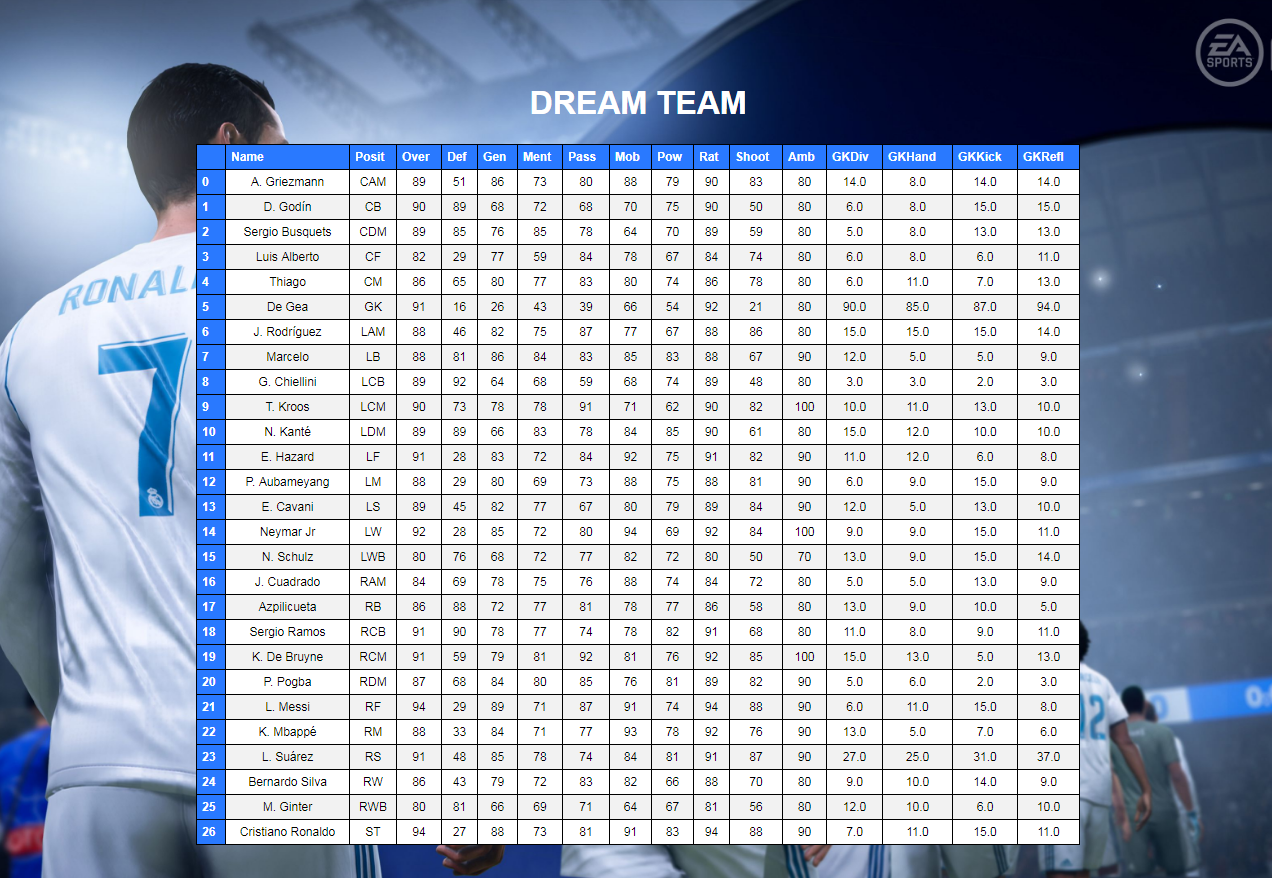

In [83]:
Image(filename= 'example/web.png', width=950)